<h1 style="text-align:center">House Prices : Advanced Regression Techniques</h3>

<h3 style="text-align:center">Load Libraries</h3>

In [1]:
import numpy as np
import pandas as pd 

# Visualizations
import seaborn as sns 
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.pipeline import Pipeline

# Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor



# plot feature importance
from xgboost import plot_importance

from sklearn.feature_selection import SelectFromModel


C:\Users\Melan\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Tweaking the style of the notebook to have centered plots

In [2]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

<h3 style="text-align:center">Load Dataset</h3>

In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

<h3 style="text-align:center">Analyze Data</h3>

In [4]:
# Shape
print("Train_df shape:", train_df.shape ) 
print("Test_df shape:", test_df.shape )

Train_df shape: (1460, 81)
Test_df shape: (1459, 80)


In [5]:
# Peek at the first 5 rows of the data
train_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [6]:
# Peek at the last 5 rows of the data
train_df.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities    ...     PoolArea PoolQC  Fence MiscFeature  \
1455         Lvl    AllPub    ...            0    NaN    NaN         NaN   
1456         Lvl    AllPub    ...            0    NaN  MnPrv         NaN   
1457         Lvl    AllPub    ...            0    NaN  GdPrv        Shed   
1458         Lvl    AllPub    ...            0    NaN    NaN         NaN   
1459         Lvl    AllPub    ...            0    NaN    NaN         NaN   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
1455       0      8   2007        WD         Normal     175000  
1456       0      2   2010        WD         Normal     210000  
1457    2500      5   2010        WD         Normal     266500  
1458       0      4   2010        WD         Normal     142125  
1459       0      6   2008        WD         Normal     147500  

[5 rows x 81 columns]

In [7]:
# Check type of each column
train_df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [8]:
# Select all the columns with missing values
# train_df.columns[train_df.isnull().any()]

missTrain_df = train_df.copy()
missTrain_df = missTrain_df.loc[:, missTrain_df.isnull().any()]
print("Column missing in training set:", missTrain_df.shape[1])

missTest_df = test_df.copy()
missTest_df = missTest_df.loc[:, missTest_df.isnull().any()]
print("Column with missing values in test set:", missTest_df.shape[1])


Column missing in training set: 19
Column with missing values in test set: 33


In [9]:
train_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

We will check for the skewness of the SalePrice, our desired target feature

Skew is: 1.88287575977


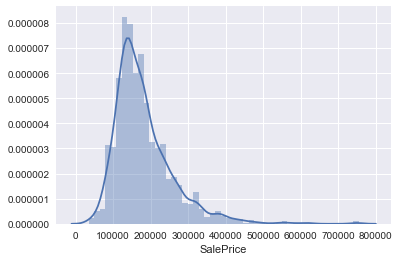

In [10]:
print( "Skew is:", train_df['SalePrice'].skew() )
sns.distplot(train_df['SalePrice'])

It is better to transform the data since it is skewed. A common way is to use the (natural) logarithm of the target variable, which is most likely work here since all values are positive (because logarithm is only positive).

Skew is: 0.121335062205


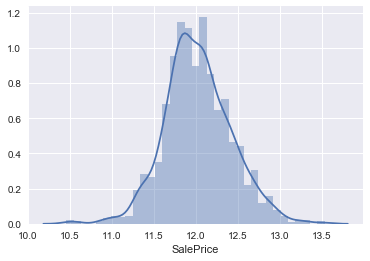

In [11]:
target = np.log(train_df['SalePrice'])
print( "Skew is:", target.skew() )
sns.distplot(target)

<h3 style="text-align:center">Exploring data</h3>

We will manipulate the features for them to be the most comprehensible for the machine learning algorithms

<b>1. Numerical Features</b>

In [12]:
num_features = train_df.select_dtypes(include=[np.number])
num_features.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

We can now examine the correlations between the numerical features and the target feature which is SalePrice.

In [13]:
corr = num_features.drop('Id', axis=1).corr()

# Features positively correlated with the sale prices
print( corr['SalePrice'].sort_values(ascending=False)[:10], "\n" )

# Features negatively correlated with the sale prices

print( corr['SalePrice'].sort_values(ascending=False)[-5:] )

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64 

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


The correlations show how the features affect the sale price. <br>
A positive correlation means that the features increase/decrease as the sale prices increase/decrease. <br>
A negative correlation means that the features will decrease as the sale prices increase, as well as features will increase as the prices increase.

<u>OverallQual</u>

We examine the first feature that is highly correlated with the sale price


In [14]:
train_df['OverallQual'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

From the data description, the OverallQual indicates the rate of the overall material and finish of the house. <br>
The values are in the interval 1 to 10 with 1 : Very Poor to 10 : Very Excellent

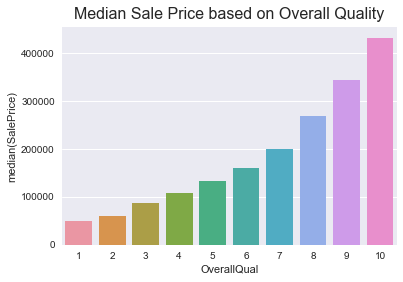

In [15]:
sns.barplot(x='OverallQual',
            y='SalePrice', 
            data=train_df, 
            estimator=np.median, # using the median estimator 
            ci=None) # Turn off error bars

plt.title('Median Sale Price based on Overall Quality', size=16, y=1.01)


<u>GrLivArea</u>

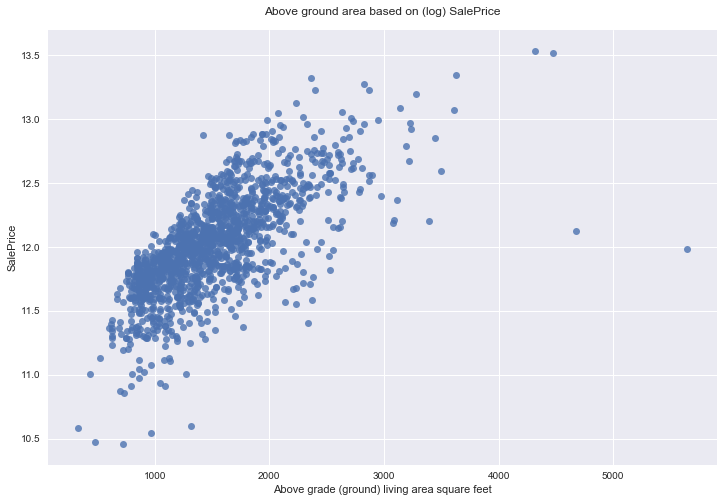

In [16]:
plt.figure(figsize=(12,8))

target = np.log(train_df['SalePrice'])
sns.regplot(x="GrLivArea", y=target, data=train_df
           , fit_reg=False)
plt.xlabel('Above grade (ground) living area square feet')
plt.title("Above ground area based on (log) SalePrice", y=1.02)

<u>GarageArea</u>

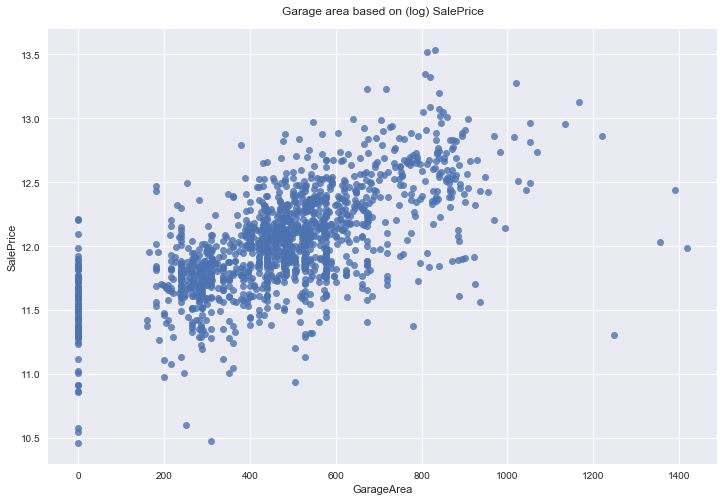

In [17]:
plt.figure(figsize=(12,8))

target = np.log(train_df['SalePrice'])
sns.regplot(x="GarageArea", y=target, data=train_df
           , fit_reg=False)

plt.title("Garage area based on (log) SalePrice", y=1.02)

We notice many homes with 0 for Garage Area inicating that they don't have a garage. <br>
There are a few ouliers as well. <br>
Outliers can affect a regression model by pulling the estimated regression line further away from the true regression line.<br>
Hence we will remove them.

In [18]:
train_df = train_df[train_df['GarageArea'] < 1200]

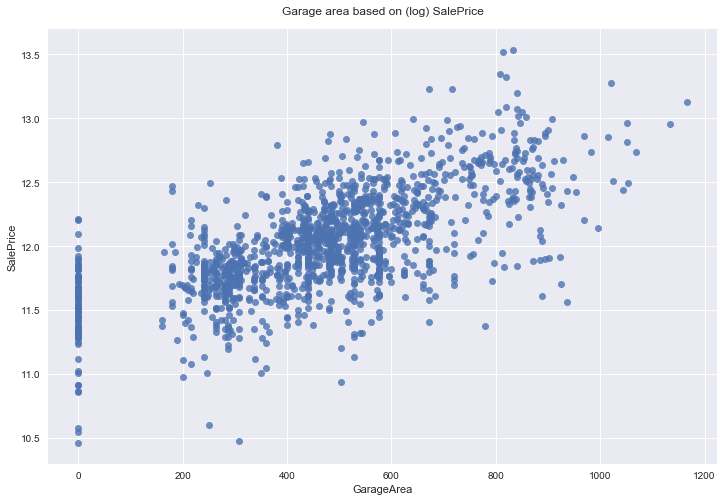

In [19]:
plt.figure(figsize=(12,8))

target = np.log(train_df['SalePrice'])
sns.regplot(x="GarageArea", y=target, data=train_df
           , fit_reg=False)

plt.title("Garage area based on (log) SalePrice", y=1.02)

<b>2. Categorical features</b>

Now we can examine categoricals features

In [20]:
categoricals = train_df.select_dtypes(include=[np.object])
categoricals.describe()

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1455   1455    91     1455        1455      1455      1455   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1147   1450    50      921        1309      1454      1048   

       LandSlope Neighborhood Condition1      ...      GarageType  \
count       1455         1455       1455      ...            1374   
unique         3           25          9      ...               6   
top          Gtl        NAmes       Norm      ...          Attchd   
freq        1378          225       1257      ...             867   

       GarageFinish GarageQual GarageCond PavedDrive PoolQC  Fence  \
count          1374       1374       1374       1455      6    281   
unique            3          5          5          3      3      4   
top             Unf         TA         TA          Y     Ex  MnPrv   
freq            605       1306       1321       1335      2    157   

       MiscFeature SaleType SaleCondition  
count           53     1455          1455  
unique           4        9             6  
top           Shed       WD        Normal  
freq            48     1266          1196  

[4 rows x 43 columns]

<b>3. Missing values</b>

This part will deal with NaN (Not a Number) values

In [21]:
nans = pd.DataFrame(train_df.isnull().sum().sort_values(ascending=False)[:20])
nans.columns = ['NaN Count']
nans.index.name = 'Feature'
nans

NaN Count
Feature                
PoolQC             1449
MiscFeature        1402
Alley              1364
Fence              1174
FireplaceQu         689
LotFrontage         258
GarageCond           81
GarageType           81
GarageYrBlt          81
GarageFinish         81
GarageQual           81
BsmtExposure         38
BsmtFinType2         38
BsmtFinType1         37
BsmtCond             37
BsmtQual             37
MasVnrArea            8
MasVnrType            8
Electrical            1
Utilities             0

We will mostly use the documentation to help us understand the missing values.

<h3 style="text-align:center">Feature engineering</h3>

All the following transformation are applied for both the training and test data. 

<b>Missing values</b>

First let's see how many columns in both the train and test set contains NaN values

In [22]:
print("Number of columns with missing values in train set: ", train_df.loc[:, train_df.isnull().any()].shape[1])
print("Number of columns with missing values in test set: ", test_df.loc[:, test_df.isnull().any()].shape[1])


Number of columns with missing values in train set:  19
Number of columns with missing values in test set:  33


<b>Missing Numerical Values</b>

On the one hand, we proceed in the transformation of NaN values in Numerical columns

In [23]:
print("Numerical columns with NaN values in train set: \n",
      train_df.loc[:, train_df.isnull().any()].select_dtypes(include=[np.number]).columns, "\n")
print("Numerical columns with NaN values in test set: \n",
      test_df.loc[:, test_df.isnull().any()].select_dtypes(include=[np.number]).columns, "\n")

Numerical columns with NaN values in train set: 
 Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object') 

Numerical columns with NaN values in test set: 
 Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
       'GarageCars', 'GarageArea'],
      dtype='object') 



We observe some of the test set missing values are more from columns where there are not any in the training set

<u>LotFrontage</u>

In [24]:
corr = num_features.drop('Id', axis=1).corr()

print( corr['MasVnrArea'].sort_values(ascending=False)[:10], "\n" )

MasVnrArea      1.000000
SalePrice       0.477493
OverallQual     0.411876
GrLivArea       0.390857
GarageArea      0.373066
GarageCars      0.364204
TotalBsmtSF     0.363936
1stFlrSF        0.344501
YearBuilt       0.315707
TotRmsAbvGrd    0.280682
Name: MasVnrArea, dtype: float64 



In [25]:
print( train_df['MasVnrArea'].describe() ) 

count    1447.000000
mean      102.615066
std       179.381349
min         0.000000
25%         0.000000
50%         0.000000
75%       164.500000
max      1600.000000
Name: MasVnrArea, dtype: float64


In [26]:
train_df['MasVnrArea'].head(10)

0    196.0
1      0.0
2    162.0
3      0.0
4    350.0
5      0.0
6    186.0
7    240.0
8      0.0
9      0.0
Name: MasVnrArea, dtype: float64

<b>Missing categorical values</b>

In [27]:
print("Categorical columns with NaN values in train set: \n",
      train_df.loc[:, train_df.isnull().any()].select_dtypes(include=[np.object]).columns, "\n")
print("Numerical columns with NaN values in test set: \n",
      test_df.loc[:, test_df.isnull().any()].select_dtypes(include=[np.object]).columns, "\n")

Categorical columns with NaN values in train set: 
 Index(['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC',
       'Fence', 'MiscFeature'],
      dtype='object') 

Numerical columns with NaN values in test set: 
 Index(['MSZoning', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType'],
      dtype='object') 



Let's tackle the features with most missing values first

In [28]:
nans = pd.DataFrame(train_df.select_dtypes(include=[np.object]).isnull().sum().sort_values(ascending=False)[:20])
nans.columns = ['NaN Count']
nans.index.name = 'Categorical Features'
nans

NaN Count
Categorical Features           
PoolQC                     1449
MiscFeature                1402
Alley                      1364
Fence                      1174
FireplaceQu                 689
GarageCond                   81
GarageQual                   81
GarageFinish                 81
GarageType                   81
BsmtFinType2                 38
BsmtExposure                 38
BsmtFinType1                 37
BsmtQual                     37
BsmtCond                     37
MasVnrType                    8
Electrical                    1
Condition2                    0
Condition1                    0
Neighborhood                  0
LandSlope                     0

<u>PoolQC</u>

We observe there is another column dealing with Pool in the dataset

In [36]:
train_df[['PoolQC', 'PoolArea']].head()

PoolQC  PoolArea
0     NA         0
1     NA         0
2     NA         0
3     NA         0
4     NA         0

In [30]:
train_df['PoolArea'].value_counts()

0      1449
738       1
648       1
576       1
555       1
519       1
512       1
Name: PoolArea, dtype: int64

In [31]:
train_df['PoolQC'].unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

Interestingly enough, we see that the number of houses where the pool area is 0 matches the number of missing categorical value in PoolQC

In [32]:
def fill_PoolQC(dataset):
    """ Fill missing values with 'NA': No Pool """
    dataset['PoolQC'].fillna(value='NA', inplace=True)
    
fill_PoolQC(train_df)
fill_PoolQC(test_df)

In [35]:
train_df['PoolQC'].unique()

array(['NA', 'Ex', 'Fa', 'Gd'], dtype=object)

<u>MiscFeature</u>

In [37]:
print( "Unique values in MiscFeature: ", train_df['MiscFeature'].unique() )

Unique values in MiscFeature:  [nan 'Shed' 'Gar2' 'Othr' 'TenC']


<h3 style="text-align:center">Data visualization</h3>

In [ ]:
train_df.drop('Id', axis=1).describe()

In [ ]:
sns.pointplot(x='YrSold', y='SalePrice', hue= 'YrSold', data=train_df)

plt.legend(bbox_to_anchor=(1.2, 0.7))
plt.xticks(rotation=20)
plt.yticks(rotation=15)
plt.title("Trend in sale prices over the years", fontsize=18)

We see that 2010 sold houses at lower prices(in mean terms) 
and that 2007 has the highest prices

In [ ]:
plt.figure(figsize=(8, 6))
sns.factorplot(x='YrSold',
               y='SalePrice', 
               data=train_df, 
               hue='YrSold', 
               col='YrSold', 
               kind='swarm',
               )  


<h3 style="text-align:center">Split-out dataset</h3>

In [ ]:
# Test options and evaluation metric
num_folds = 10
seed = 46
scoring = 'neg_mean_squared_error'

In [ ]:
train_df.head()

The plot suggests that only one feature (79) is highly informative which is the 'SaleType' feature that describes the type of sale

<h3 style="text-align:center">Evaluate algorithms : Standardization</h3>

In [ ]:
# # Standardize the dataset
# pipelines = []
# pipelines.append( ('ScaledLR', Pipeline( [('Scaler', StandardScaler()), 
#                                           ('Linear Regression', LinearRegression())] ) ) )

# pipelines.append( ('ScaledLasso', Pipeline( [('Scaler', StandardScaler()), 
#                                           ('LASSO', Lasso())] ) ) )

# pipelines.append( ('ScaledRidge', Pipeline( [('Scaler', StandardScaler()), 
#                                           ('Ridge', Ridge())] ) ) )

# pipelines.append( ('ScaledEN', Pipeline( [('Scaler', StandardScaler()), 
#                                           ('ElasticNet', ElasticNet())] ) ) )

# pipelines.append( ('ScaledEN', Pipeline( [('Scaler', StandardScaler()), 
#                                           ('ElasticNet', ElasticNet())] ) ) )

# pipelines.append( ('ScaledEN', Pipeline( [('Scaler', StandardScaler()), 
#                                           ('ElasticNet', ElasticNet())] ) ) )

# pipelines.append( ('ScaledKNN', Pipeline( [('Scaler', StandardScaler()), 
#                                           ('KNN', KNeighborsRegressor())] ) ) )

# pipelines.append( ('ScaledCART', Pipeline( [('Scaler', StandardScaler()), 
#                                           ('CART', DecisionTreeRegressor())] ) ) )

# pipelines.append( ('ScaledSVR', Pipeline( [('Scaler', StandardScaler()), 
#                                           ('SVR', KNeighborsRegressor())] ) ) )

# pipelines.append( ('ScaledRF', Pipeline( [('Scaler', StandardScaler()), 
#                                           ('RF', RandomForestRegressor(random_state=seed))] ) ) )

# pipelines.append( ('ScaledSVR', Pipeline( [('Scaler', StandardScaler()), 
#                                           ('SVR', KNeighborsRegressor())] ) ) )

# pipelines.append( ('ScaledXGB', Pipeline( [('Scaler', StandardScaler()), 
#                                           ('XGB', XGBRegressor(seed=seed))] ) ) )

# # scoring = 'r2'
# scoring = 'neg_mean_squared_error'

# results = []
# names = []

# for name, model in pipelines: 
#     kfold = KFold(n_splits=num_folds, random_state= seed)
#     cv_results = cross_val_score(model, select_X_train, Y_train, cv=kfold, scoring=scoring)
#     results.append(cv_results)
#     names.append(name)
#     msg = "%s: %.10f (%.10f)" % (name, cv_results.mean(), cv_results.std())
#     print(msg)
    
